In [4]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
os.getcwd()

'C:\\Users\\linnovision\\Problem1_6\\Problem1'

In [2]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))


<IPython.core.display.Math object>

In [5]:
path='..\\Problem1\\'
filename1='data_1_1.csv'
filename2='data_1_2.csv'
filename3='data_1_3.csv'
filename4='data_1_4.csv'
filename5='data_1_5.csv'
data_1_1 = np.genfromtxt(path+filename1, delimiter=",")[1:,:]
data_1_2 = np.genfromtxt(path+filename2, delimiter=",")[1:,:]
data_1_3 = np.genfromtxt(path+filename3, delimiter=",")[1:,:]
data_1_4 = np.genfromtxt(path+filename4, delimiter=",")[1:,:]
data_1_5 = np.genfromtxt(path+filename5, delimiter=",")[1:,:]

In [4]:
# Regression Class 1:
class Heavy_tail_regression1(object):
    # Define classs parameters
    # model noise with c*x + d
    c = np.random.random()
    d = np.random.random()
    
    def __init__(self, lambd=0):                
        #Weights (parameters)
        self.a = np.random.random()
        self.b = np.random.random()
            
        #Regularization Parameter:
        self.lambd = lambd
                    
            
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        #sigma_2 = (self.c*x)**2 + self.d**2
        c=Heavy_tail_regression1.c
        d=Heavy_tail_regression1.d
        sigma_2 = (c*x)**2 + d**2
        yHat = self.a*x+self.b
        J =  0.5*sum((y-yHat)**2/sigma_2)/x.shape[0] + 0.5*sum(np.log(sigma_2))/x.shape[0]+(self.lambd/2)*(sum(self.getParams()**2))
        return J
        
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to a, b, c, d for a given x and y:
        #sigma_2 = (self.c*x)**2 + self.d**2
        c=Heavy_tail_regression1.c
        d=Heavy_tail_regression1.d
        sigma_2 = (c*x)**2 + d**2
        yHat = self.a*x+self.b
        dJda = sum(-x*(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.a
        dJdb = sum(-(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.b
        dJdc = sum(c*x**2/sigma_2)/x.shape[0]-sum(c*x**2*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*c
        dJdd = sum(d/sigma_2)/x.shape[0]-sum(d*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*d       
        
        return dJda, dJdb, dJdc, dJdd

    def computeGradients(self, x, y, L=0):       
        dJda, dJdb, dJdc, dJdd = self.costFunctionPrime(x, y)
        if L==1:
            return np.asarray((dJdc, dJdd))
        elif L==2:
            return np.asarray((dJda, dJdb))
        else:
            return np.asarray((dJda, dJdb, dJdc, dJdd))
    
    def getParams(self, L=0):
        #Get a, b, c, d :
        if L==1:
            params = np.asarray((Heavy_tail_regression1.c, Heavy_tail_regression1.d))
        elif L==2:
            params = np.asarray((self.a, self.b))
        else:
            params = np.asarray((self.a, self.b, Heavy_tail_regression1.c, Heavy_tail_regression1.d))
        return params
    
    def setParams(self, params, L=0):
        #Set a, b, c, d :
        if L==1:
            Heavy_tail_regression1.c = params[0]
            Heavy_tail_regression1.d = params[1]
        elif L==2:
            self.a = params[0]
            self.b = params[1]
        else:
            self.a = params[0]
            self.b = params[1]
            Heavy_tail_regression1.c = params[2]
            Heavy_tail_regression1.d = params[3]
        
    def computeNumericalGradients(self, x, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(len(paramsInitial))
        perturb = np.zeros(len(paramsInitial))        
        e = 1e-5
        
        for n in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[n] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(x, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(x, y)

            #Compute Numerical Gradient
            numgrad[n] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[n] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 
    
    def dataGeneration(self, x1=-5, x2=5, N=100):
        c=abs(Heavy_tail_regression1.c)
        d=abs(Heavy_tail_regression1.d)

        np.random.seed()
        x=np.random.uniform(x1,x2,N)
        c_randn=np.random.normal(0,c,N)
        d_randn=np.random.normal(0,d,N)
        y = self.a*x + self.b + c_randn*x + d_randn        
        
        return np.append(x, y).reshape(N,2)
      
    
    
    

In [70]:
test=Heavy_tail_regression1(lambd=0.0001)
#test.setParams([ 0.46527736,  0.45757724,  -0.92293574,  -0.86094944])
test.getParams()
numgrad = test.computeNumericalGradients(data_1_1[:,0],data_1_1[:,1])
grad = test.computeGradients(data_1_1[:,0],data_1_1[:,1])
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)


5.8829428087369815e-09

In [63]:
np.random.seed()
np.random.random()
x=np.random.uniform(-10, 10, 4)
c_randn=np.random.normal(0, 1, 4)
d_randn=np.random.normal(0, 1, 4)
y=c_randn*x + d_randn

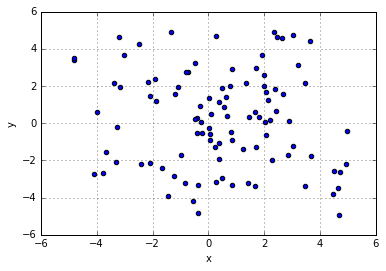

In [90]:
Rtest=Heavy_tail_regression1(lambd=0.0001)
Rdata=Rtest.dataGeneration()
scatter(Rdata[:,0],Rdata[:,1])
grid(1)
xlabel('x')
ylabel('y')

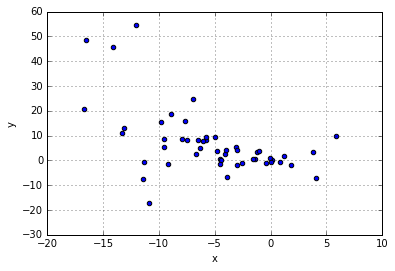

In [6]:
subplot(1,1,1)
scatter(data_1_5[:,0],data_1_5[:,1])
grid(1)
xlabel('x')
ylabel('y')

In [190]:
Reg=Heavy_tail_regression1(lambd=0.0001)
Reg.getParams()

array([ 0.41468334,  0.50990658,  1.89897769, -1.13051933])

In [191]:
numgrad = Reg.computeNumericalGradients(data_1_5[:,0],data_1_5[:,1])
numgrad

array([ 0.3046009 , -0.02172171,  0.03943316, -0.03369966])

In [38]:
grad = Reg.computeGradients(data_1_5[:,0],data_1_5[:,1])
grad

array([  6.31464297,  -0.8673458 , -39.60003991,  -2.64592537])

In [39]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

4.4535494553993121e-10

In [191]:
from scipy import optimize
class trainer(object):
    def __init__(self, Reg):
        #Make Local reference to regression class:
        self.Reg = Reg
        
    def callbackF(self, params):
        self.Reg.setParams(params)
        self.J.append(self.Reg.costFunction(self.x, self.y))
        self.testJ.append(self.Reg.costFunction(self.testX, self.testY))

    def callbackFL1(self, params):
        self.Reg.setParams(params, L=1)
        self.J.append(self.Reg.costFunction(self.x, self.y))
        self.testJ.append(self.Reg.costFunction(self.testX, self.testY))
        
    def callbackFL2(self, params):
        self.Reg.setParams(params, L=2)
        self.J.append(self.Reg.costFunction(self.x, self.y))
        self.testJ.append(self.Reg.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, x, y):
        self.Reg.setParams(params)
        cost = self.Reg.costFunction(x, y)
        grad = self.Reg.computeGradients(x,y)
        
        return cost, grad
        
    def costFunctionWrapperL1(self, params, x, y):
        self.Reg.setParams(params, L=1)
        cost = self.Reg.costFunction(x, y)
        grad = self.Reg.computeGradients(x,y,L=1)
        
        return cost, grad

    def costFunctionWrapperL2(self, params, x, y):
        self.Reg.setParams(params, L=2)
        cost = self.Reg.costFunction(x, y)
        grad = self.Reg.computeGradients(x,y,L=2)
        
        return cost, grad

    def train(self, trainX, trainY, testX, testY, L=0):
        #Make an internal variable for the callback function:
        self.x = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        if L==1:
            params0 = self.Reg.getParams(L=1)
            options = {'maxiter': 200, 'disp' : True}
            _res = optimize.minimize(self.costFunctionWrapperL1, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackFL1)
            self.Reg.setParams(_res.x, L=1)
        elif L==2:
            params0 = self.Reg.getParams(L=2)
            options = {'maxiter': 200, 'disp' : True}
            _res = optimize.minimize(self.costFunctionWrapperL2, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackFL2)
            self.Reg.setParams(_res.x, L=2)
        else:    
            params0 = self.Reg.getParams()
            options = {'maxiter': 200, 'disp' : True}
            _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)
            self.Reg.setParams(_res.x)
            
        self.optimizationResults = _res



this is just a test $$c = \sqrt{a^2 + b^2} $$  $$\Delta\hat{y}$$  next line
    the end

In [194]:
np.random.shuffle(data_1_1)
np.random.shuffle(data_1_2)
np.random.shuffle(data_1_3)
np.random.shuffle(data_1_4)
np.random.shuffle(data_1_5)
train_data_1_1 = data_1_1[:int(len(data_1_1)*.7)];test_data_1_1 = data_1_1[int(len(data_1_1)*.7):]
train_data_1_2 = data_1_2[:int(len(data_1_2)*.7)];test_data_1_2 = data_1_2[int(len(data_1_2)*.7):]
train_data_1_3 = data_1_3[:int(len(data_1_3)*.7)];test_data_1_3 = data_1_3[int(len(data_1_3)*.7):]
train_data_1_4 = data_1_4[:int(len(data_1_4)*.7)];test_data_1_4 = data_1_4[int(len(data_1_4)*.7):]
train_data_1_5 = data_1_5[:int(len(data_1_5)*.7)];test_data_1_5 = data_1_5[int(len(data_1_5)*.7):]

In [42]:
(train5.shape, cv5.shape, test5.shape)

NameError: name 'train5' is not defined

In [20]:
train_data_1_4[10,:]

array([ 2.37543458,  5.57595991])

In [77]:
Reg11=Heavy_tail_regression1(lambd=0.0001)
Reg12=Heavy_tail_regression1(lambd=0.0001)
Reg13=Heavy_tail_regression1(lambd=0.0001)
Reg14=Heavy_tail_regression1(lambd=0.0001)
Reg15=Heavy_tail_regression1(lambd=0.0001)
T11 = trainer(Reg11)
T12 = trainer(Reg12)
T13 = trainer(Reg13)
T14 = trainer(Reg14)
T15 = trainer(Reg15)

In [78]:
T11.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])

Optimization terminated successfully.
         Current function value: 1.832394
         Iterations: 29
         Function evaluations: 48
         Gradient evaluations: 48


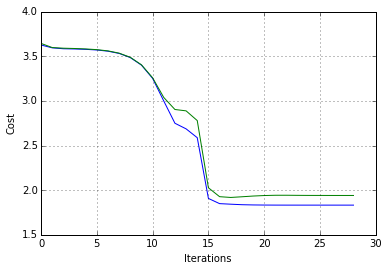

In [79]:
plot(T11.J)
plot(T11.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [23]:
T11.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
T12.train(train_data_1_2[:,0], train_data_1_2[:,1], test_data_1_2[:,0], test_data_1_2[:,1])
T13.train(train_data_1_3[:,0], train_data_1_3[:,1], test_data_1_3[:,0], test_data_1_3[:,1])
T14.train(train_data_1_4[:,0], train_data_1_4[:,1], test_data_1_4[:,0], test_data_1_4[:,1])
T15.train(train_data_1_5[:,0], train_data_1_5[:,1], test_data_1_5[:,0], test_data_1_5[:,1])
T11.optimizationResults.fun+T12.optimizationResults.fun+T13.optimizationResults.fun+ \
T14.optimizationResults.fun+T15.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.845819
         Iterations: 30
         Function evaluations: 66
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 2.978397
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 2.507997
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 1.733771
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 2.356431
         Iterations: 27
         Function evaluations: 34
         Gradient evaluations: 34


11.422414729268457

In [27]:
(Reg11.getParams(), Reg12.getParams(), Reg13.getParams(), Reg14.getParams(), Reg15.getParams())

(array([ 0.81233796, -0.11154622, -1.42870383, -0.76573043]),
 array([ 1.1718338 , -1.18867558, -1.42870383, -0.76573043]),
 array([-0.69162414, -0.45697971, -1.42870383, -0.76573043]),
 array([ 0.36697853,  0.90488389, -1.42870383, -0.76573043]),
 array([-0.94680811,  0.62283851, -1.42870383, -0.76573043]))

In [530]:
T1.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1], L=1)
T2.train(train_data_1_2[:,0], train_data_1_2[:,1], test_data_1_2[:,0], test_data_1_2[:,1], L=1)
T3.train(train_data_1_3[:,0], train_data_1_3[:,1], test_data_1_3[:,0], test_data_1_3[:,1], L=1)
T4.train(train_data_1_4[:,0], train_data_1_4[:,1], test_data_1_4[:,0], test_data_1_4[:,1], L=1)
T5.train(train_data_1_5[:,0], train_data_1_5[:,1], test_data_1_5[:,0], test_data_1_5[:,1], L=1)

T1.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1], L=2)
T2.train(train_data_1_2[:,0], train_data_1_2[:,1], test_data_1_2[:,0], test_data_1_2[:,1], L=2)
T3.train(train_data_1_3[:,0], train_data_1_3[:,1], test_data_1_3[:,0], test_data_1_3[:,1], L=2)
T4.train(train_data_1_4[:,0], train_data_1_4[:,1], test_data_1_4[:,0], test_data_1_4[:,1], L=2)
T5.train(train_data_1_5[:,0], train_data_1_5[:,1], test_data_1_5[:,0], test_data_1_5[:,1], L=2)

T1.optimizationResults.fun+T2.optimizationResults.fun+T3.optimizationResults.fun+ \
T4.optimizationResults.fun+T5.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.825637
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 2.896965
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 2.981609
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 1.640686
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.192878
         Iterations: 12
         Function evaluations: 32
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 1.908215
         Iterations: 0
         Function evaluations: 1
         G

12.005843322846886

In [427]:
Reg1=Heavy_tail_regression(lambd=0.0001)
T = trainer(Reg1)
T.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
tT.Reg.getParams()

Optimization terminated successfully.
         Current function value: 1.770028
         Iterations: 27
         Function evaluations: 33
         Gradient evaluations: 33


array([ 0.9736186 , -0.35527738, -1.85973281,  0.63290689])

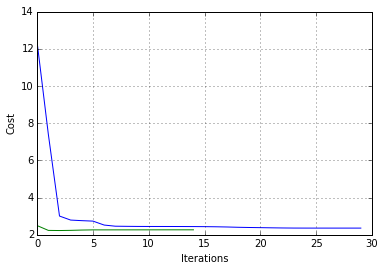

In [69]:
plot(T5.J)
plot(T1.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [242]:
#Reg2=Heavy_tail_regression(lambd=0.0001)
#T = trainer(Reg2)
T.train(train_data_1_2[:,0], train_data_1_2[:,1], test_data_1_2[:,0], test_data_1_2[:,1])
T.Reg.getParams()

Optimization terminated successfully.
         Current function value: 2.883075
         Iterations: 16
         Function evaluations: 28
         Gradient evaluations: 28


array([  1.04731770e+00,  -1.17637465e-01,   2.17588399e+00,
         3.40722754e-07])

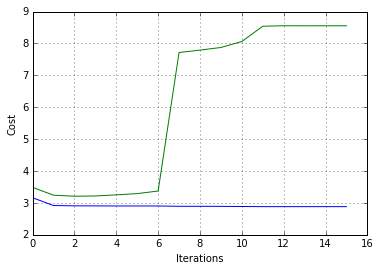

In [243]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [98]:
# Regression Class 2:
class Heavy_tail_regression2(object):
    # model noise with c*x**2 + d*x + e
    c = np.random.random()
    d = np.random.random()
    e = np.random.random()
    
    def __init__(self, lambd=0):        
        #Weights (parameters)
        self.a = np.random.random()
        self.b = np.random.random()
            
        #Regularization Parameter:
        self.lambd = lambd                    
            
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        c=Heavy_tail_regression2.c
        d=Heavy_tail_regression2.d
        e=Heavy_tail_regression2.e
        sigma_2 = (c*x**2)**2 + (d*x)**2 + e**2
        yHat = self.a*x+self.b
        J = 0.5*sum((y-yHat)**2/sigma_2)/x.shape[0] + 0.5*sum(np.log(sigma_2))/x.shape[0]+(self.lambd/2)*(sum(self.getParams()**2))
        return J
        
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to a, b, c, d for a given x and y:
        c=Heavy_tail_regression2.c
        d=Heavy_tail_regression2.d
        e=Heavy_tail_regression2.e
        sigma_2 = (c*x**2)**2 + (d*x)**2 + e**2
        yHat = self.a*x+self.b
        dJda = sum(-x*(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.a
        dJdb = sum(-(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.b
        dJdc = sum(c*x**4/sigma_2)/x.shape[0]-sum(c*x**4*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*c
        dJdd = sum(d*x**2/sigma_2)/x.shape[0]-sum(d*x**2*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*d
        dJde = sum(e/sigma_2)/x.shape[0]-sum(e*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*e       
        
        return dJda, dJdb, dJdc, dJdd, dJde

    def computeGradients(self, x, y, L=0):       
        dJda, dJdb, dJdc, dJdd, dJde = self.costFunctionPrime(x, y)
        if L==1:
            return np.asarray((dJdc, dJdd, dJde))
        elif L==2:
            return np.asarray((dJda, dJdb))
        else:
            return np.asarray((dJda, dJdb, dJdc, dJdd, dJde))
    
    def getParams(self, L=0):
        #Get a, b, c, d :
        if L==1:
            params = np.asarray((Heavy_tail_regression2.c, Heavy_tail_regression2.d, Heavy_tail_regression2.e))
        elif L==2:
            params = np.asarray((self.a, self.b))
        else:
            params = np.asarray((self.a, self.b, Heavy_tail_regression2.c, Heavy_tail_regression2.d, Heavy_tail_regression2.e))
        return params
    
    def setParams(self, params, L=0):
        #Set a, b, c, d :
        if L==1:
            Heavy_tail_regression2.c = params[0]
            Heavy_tail_regression2.d = params[1]
            Heavy_tail_regression2.e = params[2]
        elif L==2:
            self.a = params[0]
            self.b = params[1]
        else:
            self.a = params[0]
            self.b = params[1]
            Heavy_tail_regression2.c = params[2]
            Heavy_tail_regression2.d = params[3]
            Heavy_tail_regression2.e = params[4]
            
    def computeNumericalGradients(self, x, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(len(paramsInitial))
        perturb = np.zeros(len(paramsInitial))        
        e = 1e-5
        
        for n in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[n] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(x, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(x, y)

            #Compute Numerical Gradient
            numgrad[n] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[n] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 
    
    def dataGeneration(self, x1=-5, x2=5, N=100):
        c=Heavy_tail_regression2.c
        d=Heavy_tail_regression2.d
        e=Heavy_tail_regression2.e

        np.random.seed()
        x=np.random.uniform(x1,x2,N)
        c_randn=np.random.normal(0,c,N)
        d_randn=np.random.normal(0,d,N)
        e_randn=np.random.normal(0,e,N)
        y = self.a*x + self.b + c_randn*x**2 + d_randn*x + e_randn        
        
        return np.append(x, y).reshape(N,2)


In [103]:
Regr2=Heavy_tail_regression2(lambd=0.0001)
Regr2.getParams()

array([ 0.64324978,  0.89268818,  0.19187158,  0.22638629,  0.55905207])

In [104]:
numgrad = Regr2.computeNumericalGradients(data_1_1[:,0],data_1_1[:,1])
numgrad

array([ 1.31704313, -0.01520288, -5.81990313, -1.30042943, -2.2885583 ])

In [105]:
grad = Regr2.computeGradients(data_1_1[:,0],data_1_1[:,1])
grad

array([ 1.31704313, -0.01520288, -5.8199031 , -1.30042943, -2.2885583 ])

In [106]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

2.4017665039751771e-09

In [122]:
Reg21=Heavy_tail_regression2(lambd=0.0001)
Reg22=Heavy_tail_regression2(lambd=0.0001)
Reg23=Heavy_tail_regression2(lambd=0.0001)
Reg24=Heavy_tail_regression2(lambd=0.0001)
Reg25=Heavy_tail_regression2(lambd=0.0001)
T21 = trainer(Reg21)
T22 = trainer(Reg22)
T23 = trainer(Reg23)
T24 = trainer(Reg24)
T25 = trainer(Reg25)

In [123]:
T21.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
T21.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.729332
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


1.7293318183250306

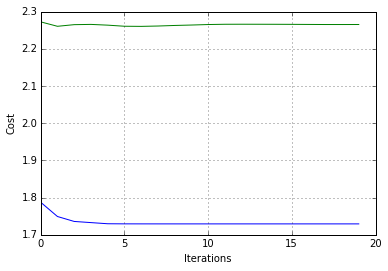

In [124]:
plot(T21.J)
plot(T21.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [125]:
T21.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
T22.train(train_data_1_2[:,0], train_data_1_2[:,1], test_data_1_2[:,0], test_data_1_2[:,1])
T23.train(train_data_1_3[:,0], train_data_1_3[:,1], test_data_1_3[:,0], test_data_1_3[:,1])
T24.train(train_data_1_4[:,0], train_data_1_4[:,1], test_data_1_4[:,0], test_data_1_4[:,1])
T25.train(train_data_1_5[:,0], train_data_1_5[:,1], test_data_1_5[:,0], test_data_1_5[:,1])
T21.optimizationResults.fun+T22.optimizationResults.fun+T23.optimizationResults.fun+ \
T24.optimizationResults.fun+T25.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.729332
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 2.508720
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 2.669054
         Iterations: 28
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 1.805991
         Iterations: 74
         Function evaluations: 111
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: 2.339195
         Iterations: 18
         Function evaluations: 25
         Gradient evaluations: 25


11.052292716224262

In [99]:
# Regression Class 3:
class Heavy_tail_regression3(object):
    # model noise with c*x**3 + d*x**2 + e*x + f
    c = np.random.random()
    d = np.random.random()
    e = np.random.random()
    f = np.random.random()
    
    def __init__(self, lambd=0):        
        #Weights (parameters)
        self.a = np.random.random()
        self.b = np.random.random()
            
        #Regularization Parameter:
        self.lambd = lambd
                    
            
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        c=Heavy_tail_regression3.c
        d=Heavy_tail_regression3.d
        e=Heavy_tail_regression3.e
        f=Heavy_tail_regression3.f
        sigma_2 = (c*x**3)**2 + (d*x**2)**2 + (e*x)**2 + f**2
        yHat = self.a*x+self.b
        J = 0.5*sum((y-yHat)**2/sigma_2)/x.shape[0] + 0.5*sum(np.log(sigma_2))/x.shape[0]+(self.lambd/2)*(sum(self.getParams()**2))
        return J
        
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to a, b, c, d, e, f for a given x and y:
        c=Heavy_tail_regression3.c
        d=Heavy_tail_regression3.d
        e=Heavy_tail_regression3.e
        f=Heavy_tail_regression3.f
        sigma_2 = (c*x**3)**2 + (d*x**2)**2 + (e*x)**2 + f**2
        yHat = self.a*x+self.b
        dJda = sum(-x*(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.a
        dJdb = sum(-(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.b
        dJdc = sum(c*x**6/sigma_2)/x.shape[0]-sum(c*x**6*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*c        
        dJdd = sum(d*x**4/sigma_2)/x.shape[0]-sum(d*x**4*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*d
        dJde = sum(e*x**2/sigma_2)/x.shape[0]-sum(e*x**2*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*e
        dJdf = sum(f/sigma_2)/x.shape[0]-sum(f*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*f       
        
        return dJda, dJdb, dJdc, dJdd, dJde, dJdf

    def computeGradients(self, x, y, L=0):       
        dJda, dJdb, dJdc, dJdd, dJde, dJdf = self.costFunctionPrime(x, y)
        if L==1:
            return np.asarray((dJdc, dJdd, dJde, dJdf))
        elif L==2:
            return np.asarray((dJda, dJdb))
        else:
            return np.asarray((dJda, dJdb, dJdc, dJdd, dJde, dJdf))
    
    def getParams(self, L=0):
        #Get a, b, c, d :
        if L==1:
            params = np.asarray((Heavy_tail_regression3.c, Heavy_tail_regression3.d, Heavy_tail_regression3.e, Heavy_tail_regression3.f))
        elif L==2:
            params = np.asarray((self.a, self.b))
        else:
            params = np.asarray((self.a, self.b, Heavy_tail_regression3.c, Heavy_tail_regression3.d, Heavy_tail_regression3.e, Heavy_tail_regression3.f))
        return params
    
    def setParams(self, params, L=0):
        #Set a, b, c, d :
        if L==1:
            Heavy_tail_regression3.c = params[0]
            Heavy_tail_regression3.d = params[1]
            Heavy_tail_regression3.e = params[2]
            Heavy_tail_regression3.f = params[3]
        elif L==2:
            self.a = params[0]
            self.b = params[1]
        else:
            self.a = params[0]
            self.b = params[1]
            Heavy_tail_regression3.c = params[2]
            Heavy_tail_regression3.d = params[3]
            Heavy_tail_regression3.e = params[4]
            Heavy_tail_regression3.f = params[5]
            
    def computeNumericalGradients(self, x, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(len(paramsInitial))
        perturb = np.zeros(len(paramsInitial))        
        e = 1e-5
        
        for n in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[n] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(x, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(x, y)

            #Compute Numerical Gradient
            numgrad[n] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[n] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 
    
    def dataGeneration(self, x1=-5, x2=5, N=100):
        c=Heavy_tail_regression3.c
        d=Heavy_tail_regression3.d
        e=Heavy_tail_regression3.e
        f=Heavy_tail_regression3.f

        np.random.seed()
        x=np.random.uniform(x1,x2,N)
        c_randn=np.random.normal(0,c,N)
        d_randn=np.random.normal(0,d,N)
        e_randn=np.random.normal(0,e,N)
        f_randn=np.random.normal(0,f,N)       
        y = self.a*x + self.b + c_randn*x**3 + d_randn*x**2 + e_randn*x + f_randn        
        
        return np.append(x, y).reshape(N,2)
    

In [127]:
Reg31=Heavy_tail_regression3(lambd=0.0001)
Reg32=Heavy_tail_regression3(lambd=0.0001)
Reg33=Heavy_tail_regression3(lambd=0.0001)
Reg34=Heavy_tail_regression3(lambd=0.0001)
Reg35=Heavy_tail_regression3(lambd=0.0001)
T31 = trainer(Reg31)
T32 = trainer(Reg32)
T33 = trainer(Reg33)
T34 = trainer(Reg34)
T35 = trainer(Reg35)

In [128]:
numgrad = Reg31.computeNumericalGradients(data_1_1[:,0],data_1_1[:,1])
numgrad

array([ -1.15659787e-01,   5.61996920e-01,  -9.32440885e-03,
        -1.08887545e+00,  -1.81740427e+00,  -1.17320100e+01])

In [129]:
grad = Reg31.computeGradients(data_1_1[:,0],data_1_1[:,1])
grad

array([ -1.15659787e-01,   5.61996920e-01,  -9.32440880e-03,
        -1.08887545e+00,  -1.81740427e+00,  -1.17320100e+01])

In [130]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

1.5177290993456627e-09

In [141]:
T31.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
T31.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.728338
         Iterations: 31
         Function evaluations: 40
         Gradient evaluations: 40


1.7283380199833436

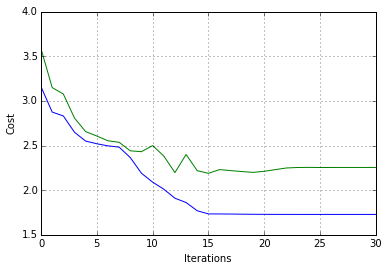

In [142]:
plot(T31.J)
plot(T31.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [100]:
# Regression Class 4:
class Heavy_tail_regression4(object):
    # model noise with c*x**4 + d*x**3 + e*x**2 + f*x + g
    c = np.random.random()
    d = np.random.random()
    e = np.random.random()
    f = np.random.random()
    g = np.random.random()
    
    def __init__(self, lambd=0):        
        
        #Weights (parameters)
        self.a = np.random.random()
        self.b = np.random.random()
            
        #Regularization Parameter:
        self.lambd = lambd
                    
            
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        c=Heavy_tail_regression4.c
        d=Heavy_tail_regression4.d
        e=Heavy_tail_regression4.e
        f=Heavy_tail_regression4.f
        g=Heavy_tail_regression4.g
        sigma_2 = (c*x**4)**2 +(d*x**3)**2 + (e*x**2)**2 + (f*x)**2 + g**2
        yHat = self.a*x+self.b
        J = 0.5*sum((y-yHat)**2/sigma_2)/x.shape[0] + 0.5*sum(np.log(sigma_2))/x.shape[0]+(self.lambd/2)*(sum(self.getParams()**2))
        return J
        
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to a, b, c, d, e, f, g for a given x and y:
        c=Heavy_tail_regression4.c
        d=Heavy_tail_regression4.d
        e=Heavy_tail_regression4.e
        f=Heavy_tail_regression4.f
        g=Heavy_tail_regression4.g
        sigma_2 = (c*x**4)**2 +(d*x**3)**2 + (e*x**2)**2 + (f*x)**2 + g**2
        yHat = self.a*x+self.b
        dJda = sum(-x*(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.a
        dJdb = sum(-(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.b
        dJdc = sum(c*x**8/sigma_2)/x.shape[0]-sum(c*x**8*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*c        
        dJdd = sum(d*x**6/sigma_2)/x.shape[0]-sum(d*x**6*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*d        
        dJde = sum(e*x**4/sigma_2)/x.shape[0]-sum(e*x**4*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*e
        dJdf = sum(f*x**2/sigma_2)/x.shape[0]-sum(f*x**2*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*f
        dJdg = sum(g/sigma_2)/x.shape[0]-sum(g*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*g       
        
        return dJda, dJdb, dJdc, dJdd, dJde, dJdf, dJdg

    def computeGradients(self, x, y, L=0):       
        dJda, dJdb, dJdc, dJdd, dJde, dJdf, dJdg = self.costFunctionPrime(x, y)
        if L==1:
            return np.asarray((dJdc, dJdd, dJde, dJdf, dJdg))
        elif L==2:
            return np.asarray((dJda, dJdb))
        else:
            return np.asarray((dJda, dJdb, dJdc, dJdd, dJde, dJdf, dJdg))
    
    def getParams(self, L=0):
        #Get a, b, c, d :
        if L==1:
            params = np.asarray((Heavy_tail_regression4.c, Heavy_tail_regression4.d, Heavy_tail_regression4.e, Heavy_tail_regression4.f, Heavy_tail_regression4.g))
        elif L==2:
            params = np.asarray((self.a, self.b))
        else:
            params = np.asarray((self.a, self.b, Heavy_tail_regression4.c, Heavy_tail_regression4.d, Heavy_tail_regression4.e, Heavy_tail_regression4.f, Heavy_tail_regression4.g))
        return params
    
    def setParams(self, params, L=0):
        #Set a, b, c, d :
        if L==1:
            Heavy_tail_regression4.c = params[0]
            Heavy_tail_regression4.d = params[1]
            Heavy_tail_regression4.e = params[2]
            Heavy_tail_regression4.f = params[3]
            Heavy_tail_regression4.g = params[4]
        elif L==2:
            self.a = params[0]
            self.b = params[1]
        else:
            self.a = params[0]
            self.b = params[1]
            Heavy_tail_regression4.c = params[2]
            Heavy_tail_regression4.d = params[3]
            Heavy_tail_regression4.e = params[4]
            Heavy_tail_regression4.f = params[5]
            Heavy_tail_regression4.g = params[6]
            
    def computeNumericalGradients(self, x, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(len(paramsInitial))
        perturb = np.zeros(len(paramsInitial))        
        e = 1e-5
        
        for n in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[n] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(x, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(x, y)

            #Compute Numerical Gradient
            numgrad[n] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[n] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 

    def dataGeneration(self, x1=-5, x2=5, N=100):
        c=Heavy_tail_regression4.c
        d=Heavy_tail_regression4.d
        e=Heavy_tail_regression4.e
        f=Heavy_tail_regression4.f
        g=Heavy_tail_regression4.g

        np.random.seed()
        x=np.random.uniform(x1,x2,N)
        c_randn=np.random.normal(0,c,N)
        d_randn=np.random.normal(0,d,N)
        e_randn=np.random.normal(0,e,N)
        f_randn=np.random.normal(0,f,N)
        g_randn=np.random.normal(0,g,N)
        y = self.a*x + self.b + c_randn*x**4 + d_randn*x**3 + e_randn*x**2 + f_randn*x + g_randn        
        
        return np.append(x, y).reshape(N,2)
    

In [132]:
Reg41=Heavy_tail_regression4(lambd=0.0001)
Reg42=Heavy_tail_regression4(lambd=0.0001)
Reg43=Heavy_tail_regression4(lambd=0.0001)
Reg44=Heavy_tail_regression4(lambd=0.0001)
Reg45=Heavy_tail_regression4(lambd=0.0001)
T41 = trainer(Reg41)
T42 = trainer(Reg42)
T43 = trainer(Reg43)
T44 = trainer(Reg44)
T45 = trainer(Reg45)

In [133]:
numgrad = Reg41.computeNumericalGradients(data_1_1[:,0],data_1_1[:,1])
numgrad

array([-0.24116803,  0.37170048,  1.03529829, -0.14195089, -0.12981136,
       -0.24292942, -1.52455142])

In [134]:
grad = Reg41.computeGradients(data_1_1[:,0],data_1_1[:,1])
grad

array([-0.24116803,  0.37170048,  1.03529829, -0.14195089, -0.12981136,
       -0.24292942, -1.52455142])

In [135]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

1.1402156498162651e-10

In [143]:
T41.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
T41.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.728338
         Iterations: 51
         Function evaluations: 55
         Gradient evaluations: 55


1.728338019973068

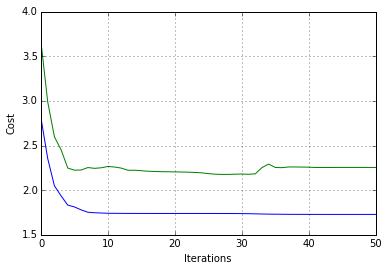

In [144]:
plot(T41.J)
plot(T41.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [94]:
# Regression Class 5:
class Heavy_tail_regression5(object):
    # model noise with c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h
    c = np.random.random()
    d = np.random.random()
    e = np.random.random()
    f = np.random.random()
    g = np.random.random()
    h = np.random.random()
    
    def __init__(self, lambd=0):        
        
        #Weights (parameters)
        self.a = np.random.random()
        self.b = np.random.random()
            
        #Regularization Parameter:
        self.lambd = lambd
                    
            
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        #sigma_2 = (self.c*x)**2 + self.d**2
        c=Heavy_tail_regression5.c
        d=Heavy_tail_regression5.d
        e=Heavy_tail_regression5.e
        f=Heavy_tail_regression5.f
        g=Heavy_tail_regression5.g
        h=Heavy_tail_regression5.h
        sigma_2 = (c*x**5)**2 + (d*x**4)**2 +(e*x**3)**2 + (f*x**2)**2 + (g*x)**2 + h**2
        yHat = self.a*x+self.b
        J = 0.5*sum((y-yHat)**2/sigma_2)/x.shape[0] + 0.5*sum(np.log(sigma_2))/x.shape[0]+(self.lambd/2)*(sum(self.getParams()**2))
        return J
        
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to a, b, c, d, e, f, g, h for a given x and y:
        c=Heavy_tail_regression5.c
        d=Heavy_tail_regression5.d
        e=Heavy_tail_regression5.e
        f=Heavy_tail_regression5.f
        g=Heavy_tail_regression5.g
        h=Heavy_tail_regression5.h
        sigma_2 = (c*x**5)**2 + (d*x**4)**2 +(e*x**3)**2 + (f*x**2)**2 + (g*x)**2 + h**2
        yHat = self.a*x+self.b
        dJda = sum(-x*(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.a
        dJdb = sum(-(y-yHat)/sigma_2)/x.shape[0] + self.lambd*self.b
        dJdc = sum(c*x**10/sigma_2)/x.shape[0]-sum(c*x**10*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*c        
        dJdd = sum(d*x**8/sigma_2)/x.shape[0]-sum(d*x**8*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*d        
        dJde = sum(e*x**6/sigma_2)/x.shape[0]-sum(e*x**6*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*e        
        dJdf = sum(f*x**4/sigma_2)/x.shape[0]-sum(f*x**4*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*f
        dJdg = sum(g*x**2/sigma_2)/x.shape[0]-sum(g*x**2*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*g
        dJdh = sum(h/sigma_2)/x.shape[0]-sum(h*(y-yHat)**2/sigma_2**2)/x.shape[0] + self.lambd*h       
        
        return dJda, dJdb, dJdc, dJdd, dJde, dJdf, dJdg, dJdh

    def computeGradients(self, x, y, L=0):       
        dJda, dJdb, dJdc, dJdd, dJde, dJdf, dJdg, dJdh = self.costFunctionPrime(x, y)
        if L==1:
            return np.asarray((dJdc, dJdd, dJde, dJdf, dJdg, dJdh))
        elif L==2:
            return np.asarray((dJda, dJdb))
        else:
            return np.asarray((dJda, dJdb, dJdc, dJdd, dJde, dJdf, dJdg, dJdh))
    
    def getParams(self, L=0):
        #Get a, b, c, d :
        if L==1:
            params = np.asarray((Heavy_tail_regression5.c, Heavy_tail_regression5.d, Heavy_tail_regression5.e, \
                                 Heavy_tail_regression5.f, Heavy_tail_regression5.g, Heavy_tail_regression5.h))
        elif L==2:
            params = np.asarray((self.a, self.b))
        else:
            params = np.asarray((self.a, self.b, Heavy_tail_regression5.c, Heavy_tail_regression5.d, Heavy_tail_regression5.e, \
                                 Heavy_tail_regression5.f, Heavy_tail_regression5.g, Heavy_tail_regression5.h))
        return params
    
    def setParams(self, params, L=0):
        #Set a, b, c, d, e, f, g, h :
        if L==1:
            Heavy_tail_regression5.c = params[0]
            Heavy_tail_regression5.d = params[1]
            Heavy_tail_regression5.e = params[2]
            Heavy_tail_regression5.f = params[3]
            Heavy_tail_regression5.g = params[4]
            Heavy_tail_regression5.h = params[5]
        elif L==2:
            self.a = params[0]
            self.b = params[1]
        else:
            self.a = params[0]
            self.b = params[1]
            Heavy_tail_regression5.c = params[2]
            Heavy_tail_regression5.d = params[3]
            Heavy_tail_regression5.e = params[4]
            Heavy_tail_regression5.f = params[5]
            Heavy_tail_regression5.g = params[6]
            Heavy_tail_regression5.h = params[7]
            
    def computeNumericalGradients(self, x, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(len(paramsInitial))
        perturb = np.zeros(len(paramsInitial))        
        e = 1e-5
        
        for n in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[n] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(x, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(x, y)

            #Compute Numerical Gradient
            numgrad[n] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[n] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 
    
    def dataGeneration(self, x1=-5, x2=5, N=100):
        c=Heavy_tail_regression5.c
        d=Heavy_tail_regression5.d
        e=Heavy_tail_regression5.e
        f=Heavy_tail_regression5.f
        g=Heavy_tail_regression5.g
        h=Heavy_tail_regression5.h
        sigma_2 = (c*x**5)**2 + (d*x**4)**2 +(e*x**3)**2 + (f*x**2)**2 + (g*x)**2 + h**2

        np.random.seed()
        x=np.random.uniform(x1,x2,N)
        c_randn=np.random.normal(0,c,N)
        d_randn=np.random.normal(0,d,N)
        e_randn=np.random.normal(0,e,N)
        f_randn=np.random.normal(0,f,N)
        g_randn=np.random.normal(0,g,N)
        h_randn=np.random.normal(0,h,N)
        y = self.a*x + self.b + c_randn*x**5 + d_randn*x**4 + e_randn*x**3 + f_randn*x**2 + g_randn*x +h_randn        
        
        return np.append(x, y).reshape(N,2)
    

In [137]:
Reg51=Heavy_tail_regression5(lambd=0.0001)
Reg52=Heavy_tail_regression5(lambd=0.0001)
Reg53=Heavy_tail_regression5(lambd=0.0001)
Reg54=Heavy_tail_regression5(lambd=0.0001)
Reg55=Heavy_tail_regression5(lambd=0.0001)
T51 = trainer(Reg51)
T52 = trainer(Reg52)
T53 = trainer(Reg53)
T54 = trainer(Reg54)
T55 = trainer(Reg55)

In [138]:
numgrad = Reg51.computeNumericalGradients(data_1_1[:,0],data_1_1[:,1])
numgrad

array([-0.26387502,  0.86884799,  1.37372671, -0.01350279, -0.03507919,
       -0.66058732, -1.06448142, -3.96062826])

In [139]:
grad = Reg51.computeGradients(data_1_1[:,0],data_1_1[:,1])
grad

array([-0.26387502,  0.86884799,  1.37372671, -0.01350279, -0.03507919,
       -0.66058732, -1.06448142, -3.96062826])

In [140]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

3.1469697534266533e-10

In [146]:
T51.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])
T51.optimizationResults.fun

Optimization terminated successfully.
         Current function value: 1.728338
         Iterations: 127
         Function evaluations: 165
         Gradient evaluations: 165


1.7283380199646576

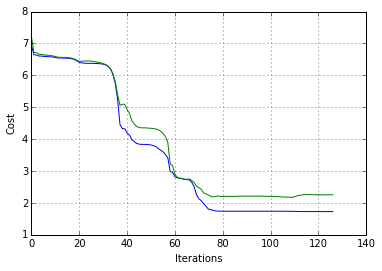

In [147]:
plot(T51.J)
plot(T51.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [204]:
np.random.shuffle(data_1_1)
np.random.shuffle(data_1_2)
np.random.shuffle(data_1_3)
np.random.shuffle(data_1_4)
np.random.shuffle(data_1_5)
train1 = data_1_1[:int(len(data_1_1)*.6)];cv1 = data_1_1[int(len(data_1_1)*.6):int(len(data_1_1)*.8)];test1 = data_1_1[int(len(data_1_1)*.8):]
train2 = data_1_2[:int(len(data_1_2)*.6)];cv2 = data_1_2[int(len(data_1_2)*.6):int(len(data_1_2)*.8)];test2 = data_1_2[int(len(data_1_2)*.8):]
train3 = data_1_3[:int(len(data_1_3)*.6)];cv3 = data_1_3[int(len(data_1_3)*.6):int(len(data_1_3)*.8)];test3 = data_1_3[int(len(data_1_3)*.8):]
train4 = data_1_4[:int(len(data_1_4)*.6)];cv4 = data_1_4[int(len(data_1_4)*.6):int(len(data_1_4)*.8)];test4 = data_1_4[int(len(data_1_4)*.8):]
train5 = data_1_5[:int(len(data_1_5)*.6)];cv5 = data_1_5[int(len(data_1_5)*.6):int(len(data_1_5)*.8)];test5 = data_1_5[int(len(data_1_5)*.8):]

In [207]:
trainJ=[]; testJ=[]

Reg1=Heavy_tail_regression1(lambd=0.0001)
Reg2=Heavy_tail_regression2(lambd=0.0001)
Reg3=Heavy_tail_regression3(lambd=0.0001)
Reg4=Heavy_tail_regression4(lambd=0.0001)
Reg5=Heavy_tail_regression5(lambd=0.0001)

T1 = trainer(Reg1)
T2 = trainer(Reg2)
T3 = trainer(Reg3)
T4 = trainer(Reg4)
T5 = trainer(Reg5)

T1.train(train1[:,0], train1[:,1], cv1[:,0], cv1[:,1])
trainJ.append(T1.optimizationResults.fun)
testJ.append(T1.Reg.costFunction(test1[:,0], test1[:,1]))

T2.train(train1[:,0], train1[:,1], cv1[:,0], cv1[:,1])
trainJ.append(T2.optimizationResults.fun)
testJ.append(T2.Reg.costFunction(test1[:,0], test1[:,1]))

T3.train(train1[:,0], train1[:,1], cv1[:,0], cv1[:,1])
trainJ.append(T3.optimizationResults.fun)
testJ.append(T3.Reg.costFunction(test1[:,0], test1[:,1]))

T4.train(train1[:,0], train1[:,1], cv1[:,0], cv1[:,1])
trainJ.append(T4.optimizationResults.fun)
testJ.append(T4.Reg.costFunction(test1[:,0], test1[:,1]))

T5.train(train1[:,0], train1[:,1], cv1[:,0], cv1[:,1])
trainJ.append(T5.optimizationResults.fun)
testJ.append(T5.Reg.costFunction(test1[:,0], test1[:,1]))


Optimization terminated successfully.
         Current function value: 1.855935
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 1.859239
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 1.854696
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.854696
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 1.854696
         Iterations: 26
         Function evaluations: 34
         Gradient evaluations: 34


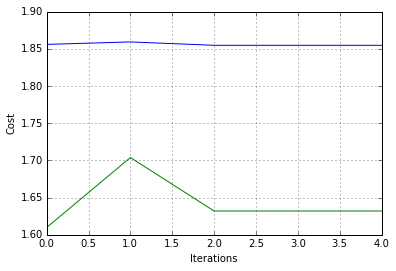

In [208]:
plot(trainJ)
plot(testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [213]:
trainJ=[]; testJ=[]

Reg1=Heavy_tail_regression1(lambd=0.0001)
Reg2=Heavy_tail_regression2(lambd=0.0001)
Reg3=Heavy_tail_regression3(lambd=0.0001)
Reg4=Heavy_tail_regression4(lambd=0.0001)
Reg5=Heavy_tail_regression5(lambd=0.0001)

T1 = trainer(Reg1)
T2 = trainer(Reg2)
T3 = trainer(Reg3)
T4 = trainer(Reg4)
T5 = trainer(Reg5)

T1.train(train2[:,0], train2[:,1], cv2[:,0], cv2[:,1])
trainJ.append(T1.optimizationResults.fun)
testJ.append(T1.Reg.costFunction(test2[:,0], test2[:,1]))

T2.train(train2[:,0], train2[:,1], cv2[:,0], cv2[:,1])
trainJ.append(T2.optimizationResults.fun)
testJ.append(T2.Reg.costFunction(test2[:,0], test2[:,1]))

T3.train(train2[:,0], train2[:,1], cv2[:,0], cv2[:,1])
trainJ.append(T3.optimizationResults.fun)
testJ.append(T3.Reg.costFunction(test2[:,0], test2[:,1]))

T4.train(train2[:,0], train2[:,1], cv2[:,0], cv2[:,1])
trainJ.append(T4.optimizationResults.fun)
testJ.append(T4.Reg.costFunction(test2[:,0], test2[:,1]))

T5.train(train2[:,0], train2[:,1], cv2[:,0], cv2[:,1])
trainJ.append(T5.optimizationResults.fun)
testJ.append(T5.Reg.costFunction(test2[:,0], test2[:,1]))

Optimization terminated successfully.
         Current function value: 2.680916
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 2.680916
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 2.680916
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 2.680916
         Iterations: 26
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 2.680916
         Iterations: 27
         Function evaluations: 47
         Gradient evaluations: 45


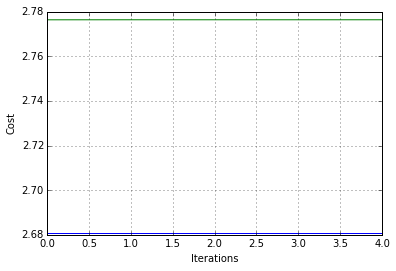

In [214]:
plot(trainJ)
plot(testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [215]:
trainJ=[]; testJ=[]

Reg1=Heavy_tail_regression1(lambd=0.0001)
Reg2=Heavy_tail_regression2(lambd=0.0001)
Reg3=Heavy_tail_regression3(lambd=0.0001)
Reg4=Heavy_tail_regression4(lambd=0.0001)
Reg5=Heavy_tail_regression5(lambd=0.0001)

T1 = trainer(Reg1)
T2 = trainer(Reg2)
T3 = trainer(Reg3)
T4 = trainer(Reg4)
T5 = trainer(Reg5)

T1.train(train3[:,0], train3[:,1], cv3[:,0], cv3[:,1])
trainJ.append(T1.optimizationResults.fun)
testJ.append(T1.Reg.costFunction(test3[:,0], test3[:,1]))

T2.train(train3[:,0], train3[:,1], cv3[:,0], cv3[:,1])
trainJ.append(T2.optimizationResults.fun)
testJ.append(T2.Reg.costFunction(test3[:,0], test3[:,1]))

T3.train(train3[:,0], train3[:,1], cv3[:,0], cv3[:,1])
trainJ.append(T3.optimizationResults.fun)
testJ.append(T3.Reg.costFunction(test3[:,0], test3[:,1]))

T4.train(train3[:,0], train3[:,1], cv3[:,0], cv3[:,1])
trainJ.append(T4.optimizationResults.fun)
testJ.append(T4.Reg.costFunction(test3[:,0], test3[:,1]))

T5.train(train3[:,0], train3[:,1], cv3[:,0], cv3[:,1])
trainJ.append(T5.optimizationResults.fun)
testJ.append(T5.Reg.costFunction(test3[:,0], test3[:,1]))

Optimization terminated successfully.
         Current function value: 2.465355
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 2.465355
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 2.465355
         Iterations: 33
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 2.465355
         Iterations: 30
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 2.465355
         Iterations: 27
         Function evaluations: 38
         Gradient evaluations: 38


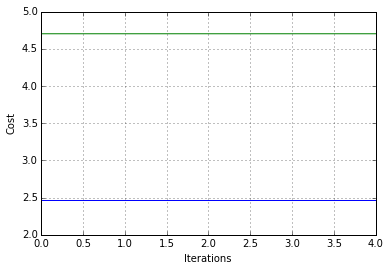

In [216]:
plot(trainJ)
plot(testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [217]:
trainJ=[]; testJ=[]

Reg1=Heavy_tail_regression1(lambd=0.0001)
Reg2=Heavy_tail_regression2(lambd=0.0001)
Reg3=Heavy_tail_regression3(lambd=0.0001)
Reg4=Heavy_tail_regression4(lambd=0.0001)
Reg5=Heavy_tail_regression5(lambd=0.0001)

T1 = trainer(Reg1)
T2 = trainer(Reg2)
T3 = trainer(Reg3)
T4 = trainer(Reg4)
T5 = trainer(Reg5)

T1.train(train4[:,0], train4[:,1], cv4[:,0], cv4[:,1])
trainJ.append(T1.optimizationResults.fun)
testJ.append(T1.Reg.costFunction(test4[:,0], test4[:,1]))

T2.train(train4[:,0], train4[:,1], cv4[:,0], cv4[:,1])
trainJ.append(T2.optimizationResults.fun)
testJ.append(T2.Reg.costFunction(test4[:,0], test4[:,1]))

T3.train(train4[:,0], train4[:,1], cv4[:,0], cv4[:,1])
trainJ.append(T3.optimizationResults.fun)
testJ.append(T3.Reg.costFunction(test4[:,0], test4[:,1]))

T4.train(train4[:,0], train4[:,1], cv4[:,0], cv4[:,1])
trainJ.append(T4.optimizationResults.fun)
testJ.append(T4.Reg.costFunction(test4[:,0], test4[:,1]))

T5.train(train4[:,0], train4[:,1], cv4[:,0], cv4[:,1])
trainJ.append(T5.optimizationResults.fun)
testJ.append(T5.Reg.costFunction(test4[:,0], test4[:,1]))

Optimization terminated successfully.
         Current function value: 1.852958
         Iterations: 17
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 1.833352
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 1.823753
         Iterations: 19
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 1.823039
         Iterations: 26
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 1.811785
         Iterations: 51
         Function evaluations: 64
         Gradient evaluations: 64


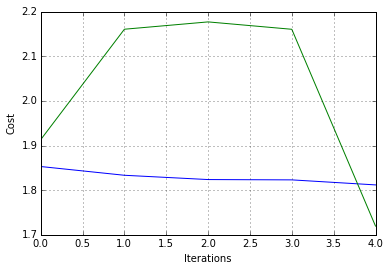

In [218]:
plot(trainJ)
plot(testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [221]:
trainJ=[]; testJ=[]

Reg1=Heavy_tail_regression1(lambd=0.0001)
Reg2=Heavy_tail_regression2(lambd=0.0001)
Reg3=Heavy_tail_regression3(lambd=0.0001)
Reg4=Heavy_tail_regression4(lambd=0.0001)
Reg5=Heavy_tail_regression5(lambd=0.0001)

T1 = trainer(Reg1)
T2 = trainer(Reg2)
T3 = trainer(Reg3)
T4 = trainer(Reg4)
T5 = trainer(Reg5)

T1.train(train5[:,0], train5[:,1], cv5[:,0], cv5[:,1])
trainJ.append(T1.optimizationResults.fun)
testJ.append(T1.Reg.costFunction(test5[:,0], test5[:,1]))

T2.train(train5[:,0], train5[:,1], cv5[:,0], cv5[:,1])
trainJ.append(T2.optimizationResults.fun)
testJ.append(T2.Reg.costFunction(test5[:,0], test5[:,1]))

T3.train(train5[:,0], train5[:,1], cv5[:,0], cv5[:,1])
trainJ.append(T3.optimizationResults.fun)
testJ.append(T3.Reg.costFunction(test5[:,0], test5[:,1]))

T4.train(train5[:,0], train5[:,1], cv5[:,0], cv5[:,1])
trainJ.append(T4.optimizationResults.fun)
testJ.append(T4.Reg.costFunction(test5[:,0], test5[:,1]))

T5.train(train5[:,0], train5[:,1], cv5[:,0], cv5[:,1])
trainJ.append(T5.optimizationResults.fun)
testJ.append(T5.Reg.costFunction(test5[:,0], test5[:,1]))

Optimization terminated successfully.
         Current function value: 2.260346
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 2.240432
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 2.232876
         Iterations: 19
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 2.232876
         Iterations: 42
         Function evaluations: 59
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 2.232876
         Iterations: 23
         Function evaluations: 44
         Gradient evaluations: 44


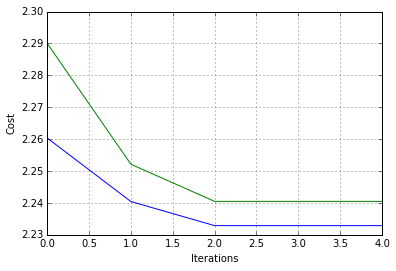

In [222]:
plot(trainJ)
plot(testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [210]:
(trainJ,testJ)

([1.8559345159770368,
  1.8592394066302982,
  1.8546956112753517,
  1.8546956114918098,
  1.8546956112263129],
 [1.6098551518571174,
  1.7038485701657968,
  1.6319826506314952,
  1.6319875958600993,
  1.6319794039304278])

array([  9.03372826e-01,  -1.66631843e-01,   4.99774495e-10,
         7.76922599e-08,   6.03090495e-02,  -1.33664059e-06,
        -2.00977143e+00,  -5.94329022e-01])

In [149]:
Reg51.costFunction(train_data_1_1[:,0], train_data_1_1[:,1])

1.7283380199646576

In [33]:
a=1
b=2
x = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = (a * x + b) ** 2
x

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [34]:
y.shape[0]

3

In [35]:
z = np.array(([3], [5], [10]), dtype=float)
z

array([[  3.],
       [  5.],
       [ 10.]])

In [36]:
z1=[z,newaxis]
z1

NameError: name 'newaxis' is not defined

In [37]:
x

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [38]:
s = np.ones((x.shape[0], 1),dtype=float)
s
s1= np.append(x, s, axis=1)
s1

array([[  3.,   5.,   1.],
       [  5.,   1.,   1.],
       [ 10.,   2.,   1.]])

In [56]:
x1 = np.arange(9.0).reshape((3, 3))
x1

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [57]:
type(x1)

numpy.ndarray

In [160]:
z+2

array([[  5.],
       [  7.],
       [ 12.]])

In [163]:
np.concatenate((z, z+2))

array([[  3.],
       [  5.],
       [ 10.],
       [  5.],
       [  7.],
       [ 12.]])

In [169]:
a=(1, 2, 3, 4)
len(a)

4

In [179]:
b=np.asarray((1, 2, 3, 4))

In [193]:
np.zeros(len(x))

array([ 0.,  0.,  0.])

In [209]:
v=np.concatenate((x.ravel(), y.ravel()))

In [441]:
v = np.array(([-13], [5], [10]), dtype=float)
v

array([[-13.],
       [  5.],
       [ 10.]])

In [447]:
v/np.amax(abs(v))

array([[-1.        ],
       [ 0.38461538],
       [ 0.76923077]])

In [167]:
foo = ['a', 'b', 'c', 'd', 'e']
from random import randrange
random_index = randrange(0,len(foo))
print foo[random_index]

c


In [6]:
from scipy.stats import cauchy
import numpy as np
class Cauchy_regression1(object):
    # Define classs parameters
    # model noise with c
    c = np.random.random()
    d = np.random.random()
    
    def __init__(self, lambd=0):                
        #Weights (parameters)
        self.a = np.random.random()
        self.b = np.random.random()
            
        #Regularization Parameter:
        self.lambd = lambd
                    
            
    def costFunction(self, x, y):
        #Compute cost for given x,y, use weights already stored in class.
        c=Cauchy_regression1.c
        d=Cauchy_regression1.d
        gamma = abs(c*x + d)
        yHat = self.a*x+self.b
        J =  sum(np.log(gamma))/x.shape[0] - sum(np.log((y-yHat)**2 + gamma**2))/x.shape[0] +(self.lambd/2)*(sum(self.getParams()**2))
        
        return J
        
    def costFunctionPrime(self, x, y):
        #Compute derivative with respect to a, b, c, d for a given x and y:
        c=Cauchy_regression1.c
        d=Cauchy_regression1.d
        gamma = (c*x + d)
        yHat = self.a*x+self.b
        dJda =  sum(x*2*(y-yHat)/(gamma**2+(y-yHat)**2))/x.shape[0] + self.lambd*self.a
        dJdb =  sum(2*(y-yHat)/(gamma**2+(y-yHat)**2))/x.shape[0] + self.lambd*self.b
        dJdc =  sum(x/gamma)/x.shape[0] - sum(x*2*gamma/(gamma**2+(y-yHat)**2))/x.shape[0] + self.lambd*c
        dJdd =  sum(1/gamma)/x.shape[0] - sum(2*gamma/(gamma**2+(y-yHat)**2))/x.shape[0] + self.lambd*d       
        
        return dJda, dJdb, dJdc, dJdd

    def computeGradients(self, x, y, L=0):       
        dJda, dJdb, dJdc, dJdd = self.costFunctionPrime(x, y)
        if L==1:
            return np.asarray((dJdc, dJdd))
        elif L==2:
            return np.asarray((dJda, dJdb))
        else:
            return np.asarray((dJda, dJdb, dJdc, dJdd))
    
    def getParams(self, L=0):
        #Get a, b, c, d :
        if L==1:
            params = np.asarray((Cauchy_regression1.c, Cauchy_regression1.d))
        elif L==2:
            params = np.asarray((self.a, self.b))
        else:
            params = np.asarray((self.a, self.b, Cauchy_regression1.c, Cauchy_regression1.d))
        return params
    
    def setParams(self, params, L=0):
        #Set a, b, c, d :
        if L==1:
            Cauchy_regression1.c = params[0]
            Cauchy_regression1.d = params[1]
        elif L==2:
            self.a = params[0]
            self.b = params[1]
        else:
            self.a = params[0]
            self.b = params[1]
            Cauchy_regression1.c = params[2]
            Cauchy_regression1.d = params[3]
        
    def computeNumericalGradients(self, x, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(len(paramsInitial))
        perturb = np.zeros(len(paramsInitial))        
        e = 1e-5
        
        for n in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[n] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(x, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(x, y)
            
            #Compute Numerical Gradient
            numgrad[n] = (loss2 - loss1) / (2*e)
            
            #Return the value we changed to zero:
            perturb[n] = 0
            print (loss2, loss1, numgrad[n])
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 
    
    def dataGeneration(self, x1=-5, x2=5, N=100):
        c=Cauchy_regression1.c
        d=Cauchy_regression1.d

        np.random.seed()
        x=np.random.uniform(x1,x2,N)
        s_rand=np.zeros(N)
        for i in range(len(x)):
            gamma =abs(c*x[i] + d)
            s_rand[i]=cauchy.rvs(loc=0, scale=gamma, size=1)
        y = self.a*x + self.b + s_rand        
        
        return np.append(x, y).reshape(2,N).transpose()
    

In [7]:
np.random.shuffle(data_1_1)
np.random.shuffle(data_1_2)
np.random.shuffle(data_1_3)
np.random.shuffle(data_1_4)
np.random.shuffle(data_1_5)
train_data_1_1 = data_1_1[:int(len(data_1_1)*.7)];test_data_1_1 = data_1_1[int(len(data_1_1)*.7):]
train_data_1_2 = data_1_2[:int(len(data_1_2)*.7)];test_data_1_2 = data_1_2[int(len(data_1_2)*.7):]
train_data_1_3 = data_1_3[:int(len(data_1_3)*.7)];test_data_1_3 = data_1_3[int(len(data_1_3)*.7):]
train_data_1_4 = data_1_4[:int(len(data_1_4)*.7)];test_data_1_4 = data_1_4[int(len(data_1_4)*.7):]
train_data_1_5 = data_1_5[:int(len(data_1_5)*.7)];test_data_1_5 = data_1_5[int(len(data_1_5)*.7):]

In [8]:
CReg=Cauchy_regression(lambd=0)
CReg.dataGeneration(x1=-500, x2=-490, N=2)
CReg.getParams()

NameError: name 'Cauchy_regression' is not defined

In [ ]:
data_1_1[0:3,]

In [ ]:
numgrad = CReg.computeNumericalGradients(data_1_1[0:100,0],data_1_1[0:100,1])
numgrad

In [437]:
grad = CReg.computeGradients(data_1_1[0:100,0],data_1_1[0:100,1])
grad

array([  2.10254265e+00,   1.01685940e-01,   7.01610957e+03,
         7.50001842e+02])

In [438]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

0.17825003595194017

In [384]:
T1 = trainer(CReg)

In [362]:
T1.train(train_data_1_1[:,0], train_data_1_1[:,1], test_data_1_1[:,0], test_data_1_1[:,1])

         Current function value: -9.965080
         Iterations: 0
         Function evaluations: 31
         Gradient evaluations: 19


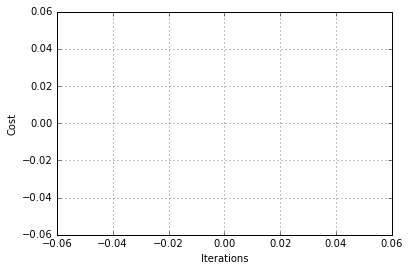

In [363]:
plot(T1.J); plot(T1.testJ); grid(1);xlabel('Iterations');ylabel('Cost')

In [150]:
s = np.random.standard_cauchy(10)
s = s[(s>-25) & (s<25)] 
s

array([  1.12939017,  -0.12404852,   1.30530087,  12.88878262,
        -5.85054191,  -1.12991999,  -1.79298168,  -1.46064777,
         1.15495453,   1.02709098])

<function matplotlib.pyplot.show>

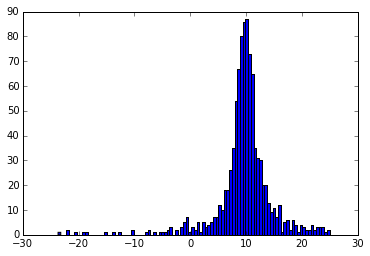

In [181]:
from scipy.stats import cauchy
#mean, var, skew, kurt = cauchy.stats(moments='mvsk')
#rv = cauchy()
x=np.random.uniform(-5,5,1)
s=cauchy.rvs(loc=10, scale=abs(x), size=1000)
#s = np.random.standard_cauchy(1000)
s = s[(s>-25) & (s<25)]
plt.hist(s, bins=100)
plt.show

In [143]:
for x in s:
    print x

1.20480221388
-0.476106571598
0.334236519831
1.23857541912
-0.305135641843
8.56143957086
-0.859288828551
-3.8107371487
4.85693578743
0.394351065926


In [137]:
a = np.zeros(100)

In [149]:
cauchy.rvs(loc=0, scale=1000, size=1)

array([ 295.02192155])

In [382]:
ng=(np.log(5+1e-5)-np.log(5-1e-5))/(2*1e-5)

In [383]:
float(1)/float(5)

0.2

In [384]:
(ng-0.2)/(ng+0.2)

-1.3377840502216908e-11